In [ ]:
import sys
import os
sys.path.append('/home/clarkmaio/workspace/pimpmyplot/')

import numpy as np
import matplotlib.pyplot as plt

import pimpmyplot as pmp



## Standard plot

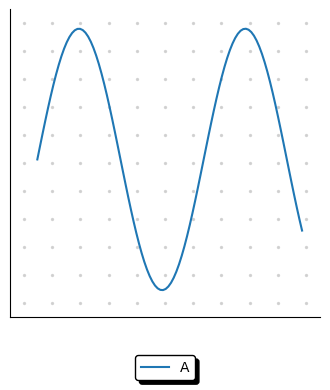

In [9]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(4, 4))
plt.plot(x, np.sin(x), label='A')

pmp.legend()                        # same as plt legend but better looking and horizontal labels as default
pmp.bullet_grid(stepinch=.3)        # dotted grid similar to a bllet journal
pmp.remove_axis('top', 'right')     # remove axis in a simpler way
pmp.remove_ticks()                  # remove ticks in a simpler way

## Subplots

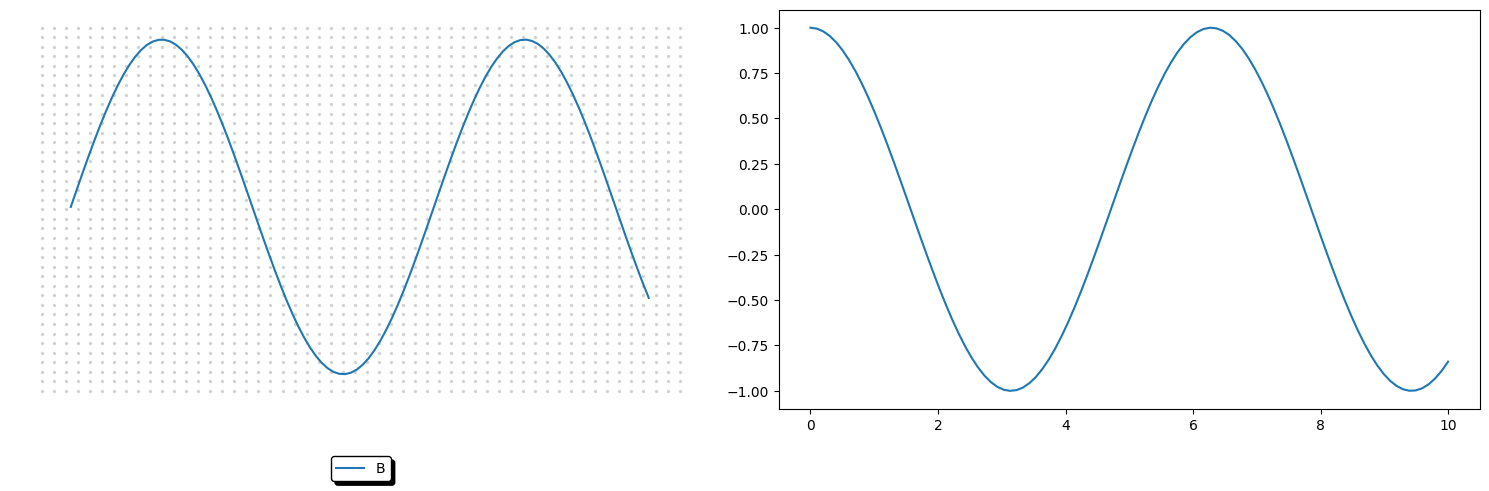

In [8]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.exp(x)/10000, np.sin(x), np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(x, y2, label='B')
ax[1].plot(x, y3, label='C')

pmp.bullet_grid(ax=ax[0], stepinch=.1)
pmp.legend(ax=ax[0])
pmp.remove_axis(ax=ax[0])
pmp.remove_ticks(ax=ax[0])
plt.tight_layout()